In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta

# Задание 1
С помощью открытого набора данных baseball выведите имя и фамилию питчера (падающего) обладающего самой высокой скоростью броска для каждой команды за все сезоны.
Открытый набор данных можно найти в открытых датасетах для Bigquery:  
В качестве ответа на данный вопрос необходимо предоставить SQL запрос, который выводит необходимые данные, а также сами эти данные. 

## Ответ
SQL запрос:
```WITH all_season as (
  SELECT inningHalf, pitcherFirstName, pitcherLastName, 
         pitchSpeed, awayTeamName, homeTeamName  
  FROM `bigquery-public-data.baseball.games_post_wide` 
  WHERE pitchSpeed > 0
  UNION ALL  
    SELECT inningHalf, pitcherFirstName, pitcherLastName, 
           pitchSpeed, awayTeamName, homeTeamName  
    FROM `bigquery-public-data.baseball.games_wide` 
    WHERE pitchSpeed > 0
    ),
  nameTeamMaxSpead as (
  SELECT pitchName, teamName, MAX(pitchSpeed) AS maxSpeed, 
         ROW_NUMBER() OVER(PARTITION BY teamName ORDER BY teamName 
                           DESC, MAX(pitchSpeed) DESC) AS RowNumber
  FROM
    (SELECT  CONCAT(pitcherFirstName, " ", pitcherLastName) AS pitchName, 
             pitchSpeed, homeTeamName AS teamName
    FROM all_season
    WHERE inningHalf='TOP'
    UNION ALL 
    SELECT  CONCAT(pitcherFirstName, " ", pitcherLastName) AS pitchName, 
            pitchSpeed, awayTeamName AS teamName
    FROM all_season
    WHERE inningHalf='BOT')
  GROUP BY pitchName, teamName
  )

SELECT pitchName, teamName, maxSpeed
FROM nameTeamMaxSpead
WHERE RowNumber=1
ORDER BY teamName
```

In [4]:
df_pitch_speed = pd.read_csv('data_pitchers_speed.csv')
print('\033[1m', 
      'Имена питчеров с максимальной скоростью броска за сезон 2016 и пост сезон 2016, по командам:', 
      '\033[0m')
display(df_pitch_speed)

 Имена питчеров с максимальной скоростью броска за сезон 2016 и пост сезон 2016, по командам: 


,pitchName,teamName,maxSpeed
0,Dellin Betances,American League,100
1,Juan Ramirez,Angels,100
2,Kenneth Giles,Astros,101
3,John Axford,Athletics,99
4,James Happ,Blue Jays,910
5,Mauricio Cabrera,Braves,103
6,Wily Peralta,Brewers,99
7,Carlos Martinez,Cardinals,101
8,Albertin Chapman,Cubs,104
9,Enrique Burgos,Diamondbacks,99


# Задание 2
## На данных из приложенного файла (test data.csv):

### 2.1  Что это за компания? :) 

In [5]:
#Загружаю датасет
df_job = pd.read_csv('data_for_test_task.csv')
#Перевожу колонку Date в формат даты
df_job['Date'] = df_job['Date'].apply(pd.to_datetime)

display(df_job.info())
display(df_job.head())
print('')
print('Количество резюме по категориям:')
df_job['Category'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28819 entries, 0 to 28818
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      28819 non-null  datetime64[ns]
 1   Category  28819 non-null  object        
 2   Age       28819 non-null  object        
 3   Gender    28819 non-null  object        
 4   Sessions  28819 non-null  int64         
 5   Users     28819 non-null  int64         
 6   Goals     28819 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.5+ MB


None

,Date,Category,Age,Gender,Sessions,Users,Goals
0,2020-03-02,Prodazhi,25-34,female,22235,10504,185
1,2020-03-03,Prodazhi,25-34,female,20423,10425,181
2,2020-03-10,Prodazhi,25-34,female,19784,10167,205
3,2020-03-04,Prodazhi,25-34,female,19394,9917,174
4,2020-03-11,Prodazhi,25-34,female,18875,9813,214



Количество резюме по категориям:


Prodazhi                                                    1092
Stroitelstvo-Nedvizhimost                                   1092
Buhgalterija-Upravlencheskij-uchet-Finansy-predprijatija    1092
Rabochij-personal                                           1092
Juristy                                                     1092
Vysshij-menedzhment                                         1092
Marketing-Reklama-PR                                        1092
Medicina-Farmacevtika                                       1092
Nachalo-karery-Studenty                                     1092
Transport-Logistika                                         1092
Proizvodstvo                                                1092
Administrativnyj-personal                                   1092
Informacionnye-tehnologii-Internet-Telekom                  1092
Nauka-Obrazovanie                                           1091
Banki-Investicii-Lizing                                     1091
Iskusstvo-Razvlechenija-M

### Ответ
После просмотра информации в датасете, а также из следующего вопроса, становиться понятно что это компания по публикции вакансий и резюме

### 2.2 Построить две диаграммы распределения (гистограмма или на твой выбор) созданий резюме (Goals) для студентов, начинающих карьеру – отдельно для male и female. Какие выводы можно сделать из полученных данных?

In [6]:
#Оставляю только категорию студентов
df_students = df_job.loc[df_job['Category']=='Nachalo-karery-Studenty'].copy()
#Размечаю номером месяца и недели для отслеживания динамики
df_students['week'] = df_students['Date'].dt.isocalendar().week
df_students['month'] = df_students['Date'].dt.month
df_students['week_day'] = df_students['Date'].dt.weekday
df_students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 132 to 26715
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1092 non-null   datetime64[ns]
 1   Category  1092 non-null   object        
 2   Age       1092 non-null   object        
 3   Gender    1092 non-null   object        
 4   Sessions  1092 non-null   int64         
 5   Users     1092 non-null   int64         
 6   Goals     1092 non-null   int64         
 7   week      1092 non-null   UInt32        
 8   month     1092 non-null   int64         
 9   week_day  1092 non-null   int64         
dtypes: UInt32(1), datetime64[ns](1), int64(5), object(3)
memory usage: 90.6+ KB


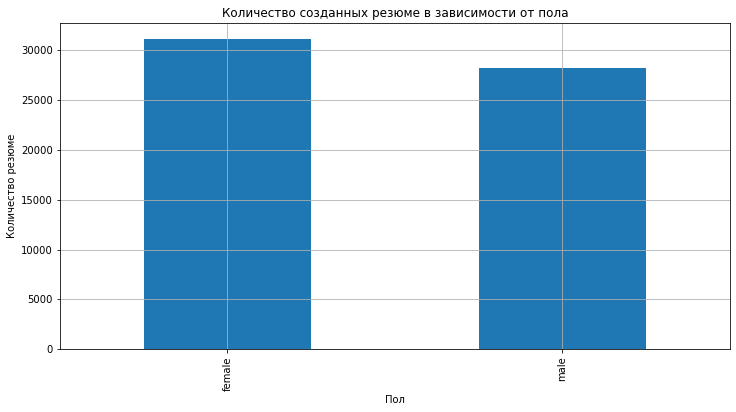

In [7]:
df_students.groupby('Gender')['Goals'].sum().plot(figsize=(12,6), kind='bar', grid=True)
plt.title('Количество созданных резюме в зависимости от пола')
plt.ylabel('Количество резюме')
plt.xlabel('Пол');


In [8]:
prc_above = (((df_students.query('Gender=="female"')['Goals'].sum() 
              / df_students.query('Gender=="male"')['Goals'].sum()) 
             - 1)*100).round(1)
print(f'\033[1m Женских резюме больше на {prc_above}%')

 Женских резюме больше на 10.6%


Посмотрим как распределяются резюме в зависимости от пола и возраста:

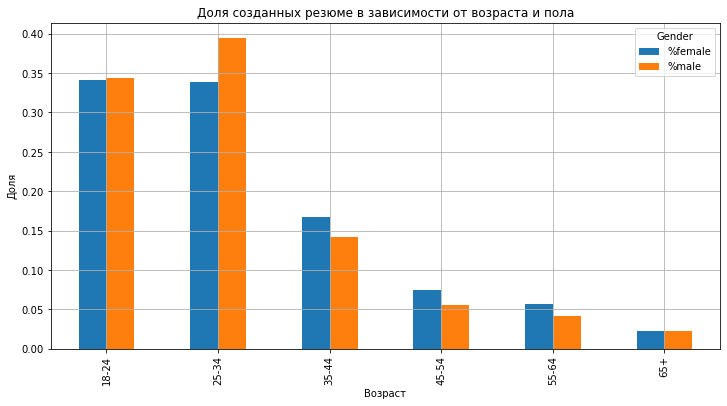

In [17]:
df_students_goals_by_age = df_students.pivot_table(index='Age', 
                                                   columns='Gender', 
                                                   values='Goals', 
                                                   aggfunc='sum')
df_students_goals_by_age['%female'] = (df_students_goals_by_age['female'] 
                                       / df_students_goals_by_age['female'].sum())
df_students_goals_by_age['%male'] = (df_students_goals_by_age['male'] 
                                     / df_students_goals_by_age['male'].sum())
df_students_goals_by_age[['%female', '%male']].plot(figsize=(12,6), grid=True, kind='bar')
plt.title('Доля созданных резюме в зависимости от возраста и пола')
plt.ylabel('Доля')
plt.xlabel('Возраст');

Среди женщин больше пользователей от 35 лет

Посмотрим на динамуку создания резюме по времени:

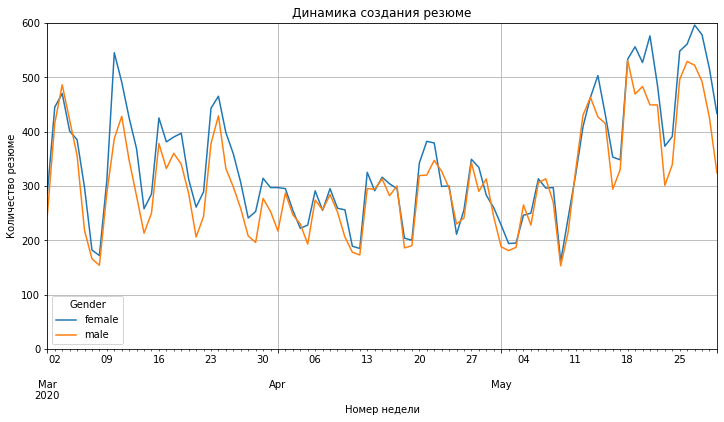

In [18]:
df_students_users_by_gender = df_students.pivot_table(index='Date', 
                                                      columns='Gender', 
                                                      values='Goals', 
                                                      aggfunc='sum')
df_students_users_by_gender.plot(figsize=(12,6), grid=True, kind='line')
plt.ylim(0,600)
plt.title('Динамика создания резюме')
plt.ylabel('Количество резюме')
plt.xlabel('Номер недели');

С начала марта по конец апреля виден спад по количеству созданных резюме, однако уже в мае наблюдается рост.

На графике также видна зависимость количества созданий резюме от дня недели. 

Посмотрим на распределение по дням недели:

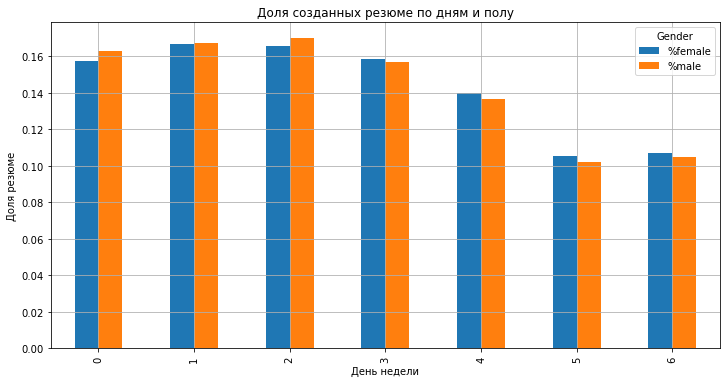

In [19]:
df_students_weekday = df_students.pivot_table(index='Gender',  
                                              columns = 'week_day',
                                              values='Goals', 
                                              aggfunc='sum').T
df_students_weekday['%female'] = df_students_weekday['female'] / df_students_weekday['female'].sum()
df_students_weekday['%male'] = df_students_weekday['male'] / df_students_weekday['male'].sum()
df_students_weekday[['%female', '%male']].plot(figsize=(12,6), grid=True, kind='bar')
plt.title('Доля созданных резюме по дням и полу')
plt.ylabel('Доля резюме')
plt.xlabel('День недели');

С понедельника по четверг чаще всего создают резюме

Оценим активность в расчете на 1 пользователя - среднее количество созданных резюме и сессий в день

,Goals_by_user,Sessions_by_user
Gender,,
female,0.073813,1.528469
male,0.073485,1.541816


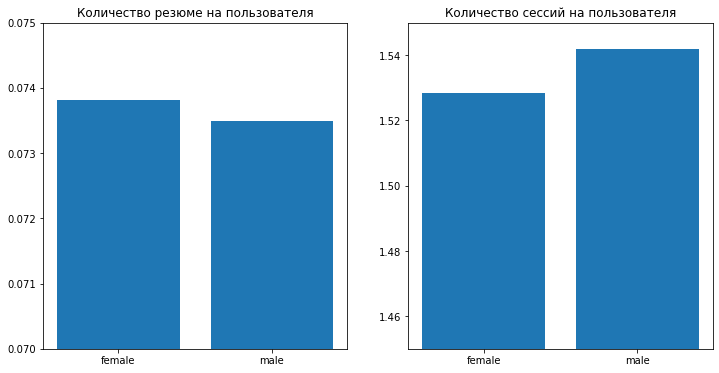

In [20]:
df_students_users = df_students.pivot_table(index='Gender',  
                                            values=['Goals', 'Users', 'Sessions'], 
                                            aggfunc='sum')
df_students_users['Goals_by_user'] = df_students_users['Goals'] / df_students_users['Users']
df_students_users['Sessions_by_user'] = df_students_users['Sessions'] / df_students_users['Users']
report = df_students_users[['Goals_by_user', 'Sessions_by_user']]
fig=plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.bar(report.reset_index()['Gender'], report['Goals_by_user'])
ax2.bar(report.reset_index()['Gender'], report['Sessions_by_user'])
ax1.set_title('Количество резюме на пользователя')
ax1.set_ylim([0.07,0.075])
ax2.set_title('Количество сессий на пользователя')
ax2.set_ylim([1.45,1.55])
report

Отличий в активности по частоте создания резюме и сессий нет

#### Ответ
- Женских резюме в категории для студентов начинающих карьеру, больше на 10% чем мужских
- С начала марта по конец апреля наблюдался спад по количеству созданных резюме, однако уже в мае наблюдается рост
- С понедельника по четверг чаще всего создают резюме
- Отличий в активности между мужчинами и женщинами не наблюдается

### 2.3 Необходимо спрогнозировать объем трафика для сегмента «Informacionnye-tehnologii-Internet-Telekom». 
#### 2.3.1 Постройте прогноз на месяц вперед. Какой метод использовался и почему?

Для прогноза трафика попробуем сгенерировать возможные запросы по которым пользователи искали продукт и посмотреть как менялось количество запросов  и соответственно спрос по месяцам. Оценив изменения за доступные периоды, предположим что в 2020 изменения были аналогичными и сделаем прогноз трафика на следующий месяц.

Причины по которым точность прогноза снижена:
- Анализ проводится в апреле. 
- Данные по трафику компании есть за март, апрель, май. Прогноз нужен на июнь
- Таким образом мы можем посмотреть статистику запросов в Яндекс Вордстат за часть апреля, май, июнь 2021 года / март 2023 / март-июнь 2022 года. 
- С марта 2022 года был большой рост интереса к it образованию и работе, связанный с политическими факторами, поэтому 2022 год мы не можем использовать для прогноза трафика 2020 года - поведение пользователей сильно отличалось.
- Остается использовать для прогноза данные за апрель-июнь 2021 года. При этом фактически на сайте был большой спад трафика с марта по апрель, что могло бы послужить хорошим маркером определения характерных запросов для прогноза трафика


In [21]:
#Оставляю только категорию информационных технологий
df_inf = df_job.loc[df_job['Category']=='Informacionnye-tehnologii-Internet-Telekom'].copy()
df_inf['week'] = df_inf['Date'].dt.isocalendar().week
df_inf['month'] = df_inf['Date'].dt.month
df_inf.head()

,Date,Category,Age,Gender,Sessions,Users,Goals,week,month
7,2020-03-02,Informacionnye-tehnologii-Internet-Telekom,25-34,male,17620,8735,85,10,3
8,2020-03-03,Informacionnye-tehnologii-Internet-Telekom,25-34,male,17532,8911,79,10,3
13,2020-03-04,Informacionnye-tehnologii-Internet-Telekom,25-34,male,16912,8716,71,10,3
16,2020-03-10,Informacionnye-tehnologii-Internet-Telekom,25-34,male,16343,8411,103,11,3
19,2020-03-05,Informacionnye-tehnologii-Internet-Telekom,25-34,male,16076,8357,81,10,3


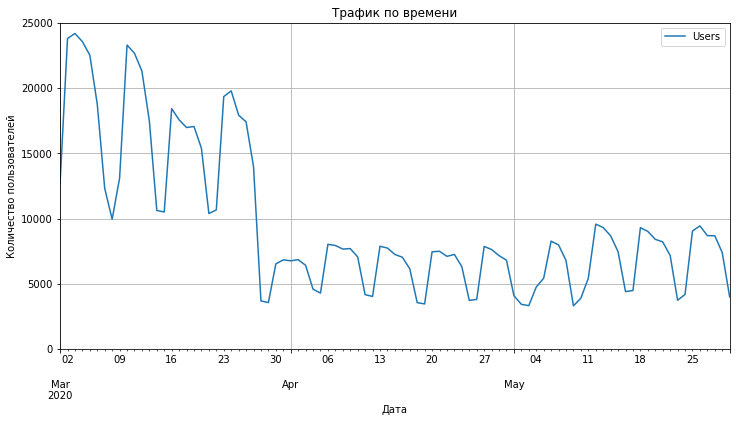

In [22]:
df_inf_traf = df_inf.pivot_table(index='Date', 
                                 values='Users', 
                                 aggfunc='sum')
df_inf_traf.plot(figsize=(12,6), grid=True, kind='line')
plt.ylim(0,25000)
plt.title('Трафик по времени')
plt.ylabel('Количество пользователей')
plt.xlabel('Дата');

Трафик в категории снизился примерно с 20 тысяч в марте до 6 тысяч в апреле, в сутки. 

`Необходимо уточнить у заказчика были ли какие либо проблемы или нововведения на сайте в марте.`

Так как такой возможности нет, исхожу из предположения что сайт/приложение работали в обычном режиме

Уберем месяц за который нет статистики в Вордстате и построим график по неделям:

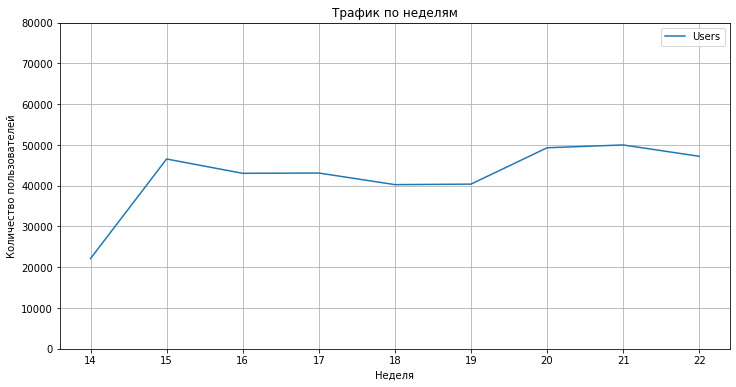

In [23]:
df_inf_new_period = df_inf.loc[(df_inf['Date'].dt.date)>date(2020,4,1)]
df_inf_week = df_inf_new_period.pivot_table(index='week', 
                                 values='Users', 
                                 aggfunc='sum')
df_inf_week.plot(figsize=(12,6), grid=True, kind='line')
plt.ylim(0,80000)
plt.title('Трафик по неделям')
plt.ylabel('Количество пользователей')
plt.xlabel('Неделя');

Запрос `работа в it` в целом повторяет колебания трафика в 2020 году - небольшой спад в начале мая с последующим ростом




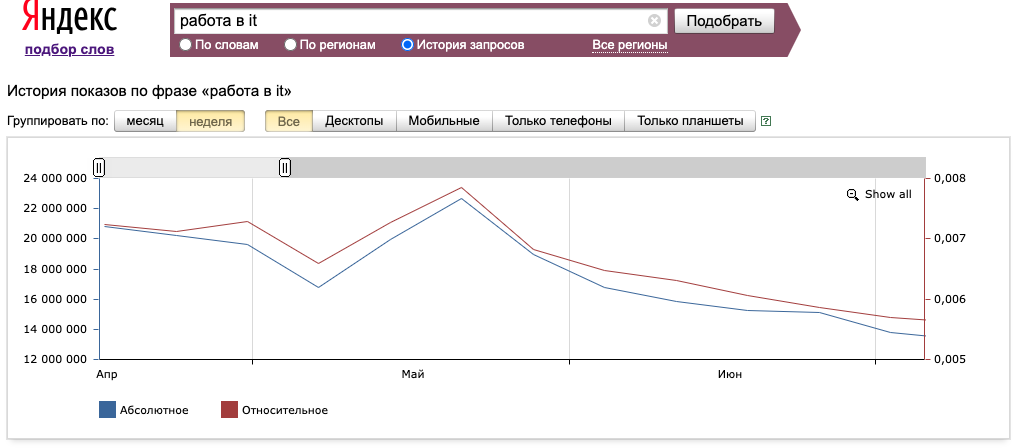

Таким образом в июне по сравнению с маем - прогнозируется снижение трафика на 17%

Посчитаем прогнозируемое количество пользователей в июне 2020 года:

In [24]:
df_inf_predict = df_inf_new_period.groupby('month', as_index=False)['Users'].sum()
df_inf_predict.loc[2] = [6, round(df_inf_predict.iloc[1,1]*(1-.17), 0)]
display(df_inf_predict)

,month,Users
0,4.0,184277.0
1,5.0,197740.0
2,6.0,164124.0


#### Ответ 
- Прогнозируемое количество пользователей в июне, в сегменте «Informacionnye-tehnologii-Internet-Telekom» -  164124 пользователя.
- Использовался метод прогноза по историческим данным по открытой статистике
- Метод использовался так как нет доступа к более точной статистике

#### 2.3.2 Какие данные вам понадобятся для построения более корректного прогноза?
#### Ответ:
- Статистика компании по трафику за предыдущие аналогичные периоды
- Семантическое ядро сегмента для SEO и контекстной рекламы

#### 2.3.3 Опишите, как бы вы подходили к этой задаче при возможности доступа к любым данным.
#### Ответ:
- Необходимо узнать проводились ли какие либо акции, мероприятия, работы на сайте/приложении которых обыно не проводят, чтобы оценить насколько корректна статистика за предыдущие месяцы. Если было много акций и т.п. то оценить какой мог быть трафик без этих факторов
- Уточнить будут ли проводиться какие либо акции, мероприятия, работы на сайте/приложении в прогнозируемом месяце. Оценить как могут эти акции и т.п. повлиять на трафик, например по опыту предыдущих акций и т.п.
- Узнать какой рекламный бюджет планируеся на прогнозируемый месяц, определить понижен он, повышен или в норме относительно обыного заложения бюджета
- Посмотреть как вел себя трафик за предыдущие аналогичные периоды, определить сезонность, сделать предположение что тенденция будет аналогичная + учесть факторы из предыдущих пунктов

# Задание 3
 У клиента (ecommerce) наблюдается спад продаж в последний месяц, но с трафиком на сайт все в порядке. У тебя есть доступ к ЯМ и CRM. Какие вопросы ты задашь клиенту и что будешь делать для нахождения причины спада?. Какие вопросы ты задашь клиенту и что будешь делать для объяснения аномалии? Прошу дать ответ на этот вопрос в виде аргументированных сценариев.
 
#### Ответ
#### Какие вопросы ты задашь клиенту и что будешь делать для нахождения причины спада?
- Необходимо понять, спад продаж наблюдается по всем категориям или в каких то конкретных. Как понять - посмотреть статистику по доходу в ЯМ с сегментацией по категориям. Сделать выгрузку по продажам из CRM либо пытаться провести анализ в CRM. Уточнить у клиента заметил ли он спад и если да то в каких категориях.
- Необходимо понять спад продаж по всем источникам трафика или по каким то конкретным. Как понять - в ЯМ/CRM провести анализ дохода в разрезе источников трафика или рекламных кампаний. Возможно снизилось качество трафика по определенному источнику/кампании и т.п.
- Сравнить данные по продажам в ЯМ и CRM. Если в ЯМ доход сильно ниже чем в CRM - проверить настройки и интеграции, если же в CRM доход сильно ниже ЯМ, выяснить мог ли кто то заполнить CRM некорректно(например новый сотрудник)
- Определить время после которого начался спад. Уточнить у клиента проводились ли акции и т.п. а также были ли нововведения в обработке заявок в это время
- Проверить мог ли спад быть вызван сезонностью 

#### Какие вопросы ты задашь клиенту и что будешь делать для объяснения аномалии?
- В зависимости от найденной причины необходимо подготовить отчет где будут показы корреляции между снижением дохода и найденной причиной, а также описать пути решения. Уточнить у клиента согласен ли он с полученной информацией. Если согласен то внедрить предложенные пути решения, если нет попросить аргументировать свою позицию после чего, провести анализ с целью подтвердить или опровергнуть аргументы